In [15]:
import os
import zipfile

zip_file_path = 'C:/VIN_PYCHARM/ONE/Data/cats_and_dogs_filtered.zip'
unzip_path = 'C:/VIN_PYCHARM/ONE/Data/temp'

zipref = zipfile.ZipFile(zip_file_path, 'r')
zipref.extractall(unzip_path)
zipref.close()

base_folder = os.path.join(unzip_path, 'cats_and_dogs_filtered')
train_folder = os.path.join(base_folder, 'train')
validation_folder = os.path.join(base_folder, 'validation')

train_folder_cat = os.path.join(train_folder, 'cats')
validation_folder_cat = os.path.join(validation_folder, 'cats')
train_folder_dog = os.path.join(train_folder,'dogs')
validation_folder_dog = os.path.join(validation_folder, 'dogs')

In [16]:
import tensorflow as tf
from tensorflow import keras

THRESHOLD_ACCURACY = 0.9999

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs['accuracy']) > THRESHOLD_ACCURACY:
            print(("\nAchieved desire accuracy, Stops training"))
            self.model.stop_training = true

In [17]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(128,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [18]:
from tensorflow.keras.optimizers import RMSprop


model.compile(optimizer=RMSprop(lr=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagenerator = ImageDataGenerator(rescale=1.0/255)
validation_datagenerator = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagenerator.flow_from_directory(train_folder,
                                                          target_size=(150,150),
                                                          class_mode='binary',
                                                          batch_size=10)

validation_generator = validation_datagenerator.flow_from_directory(validation_folder,
                                                                    target_size=(150,150),
                                                                    class_mode='binary',
                                                                    batch_size=10)
callbacks = myCallback()

history = model.fit(train_generator,
                    validation_data= validation_generator,
                    steps_per_epoch = 100,
                    epochs=15,
                    validation_steps=50,
                    verbose=2,
                    callbacks = [callbacks])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/15
100/100 - 64s - loss: 0.9939 - accuracy: 0.5335 - val_loss: 0.6653 - val_accuracy: 0.5920
Epoch 2/15
100/100 - 64s - loss: 0.6766 - accuracy: 0.6105 - val_loss: 0.6293 - val_accuracy: 0.6460
Epoch 3/15
100/100 - 64s - loss: 0.6073 - accuracy: 0.6980 - val_loss: 0.5919 - val_accuracy: 0.6820
Epoch 4/15
100/100 - 64s - loss: 0.5143 - accuracy: 0.7515 - val_loss: 0.5766 - val_accuracy: 0.7090
Epoch 5/15
100/100 - 65s - loss: 0.4437 - accuracy: 0.7920 - val_loss: 0.7028 - val_accuracy: 0.6800
Epoch 6/15
100/100 - 65s - loss: 0.3672 - accuracy: 0.8325 - val_loss: 0.6143 - val_accuracy: 0.7180
Epoch 7/15
100/100 - 65s - loss: 0.2799 - accuracy: 0.8755 - val_loss: 0.8678 - val_accuracy: 0.7000
Epoch 8/15
100/100 - 65s - loss: 0.2151 - accuracy: 0.9110 - val_loss: 0.9209 - val_accuracy: 0.7260
Epoch 9/15
100/100 - 65s - loss: 0.1508 - accuracy: 0.9405 - val_loss: 1.1049 - val_accuracy: 0.6930
Epoch 1

Text(0.5, 1.0, 'training and validating loss')

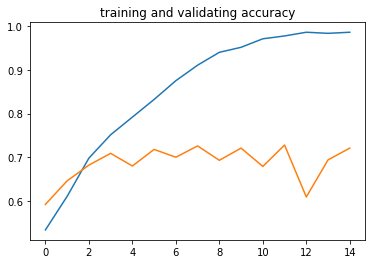

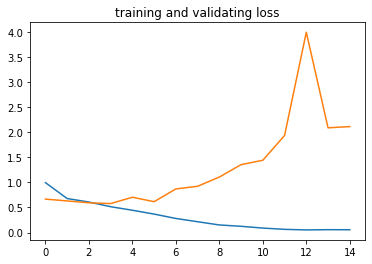

In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('training and validating accuracy')
plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('training and validating loss')